In [139]:
import pandas as pd
import numpy as np
from sklearn_utils.visualization_utils import *
from sklearn_utils.data_exploration_utils import *
from sklearn_utils.cv_utils import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [184]:
df = pd.read_csv("../data/kaggle_cc_fraud/creditcardfraud.zip", compression="zip")

In [185]:
label = "Class"
features = [feature for feature in df.columns if feature != label]

In [186]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [21]:
df[label] = df[label].astype("category")

In [22]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [61]:
find_missing_data_stats(df)

Number of columns with missing entries: 0
Total number of missing entries: 0


In [64]:
corr_df = generate_correlation_df(df, df.columns, imbalanced=True, label=label)
corr_df.head()

class label will be treated as integer to calculate correlation
calculating correlation through {} folds split of undersampled majority classes


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.238719,-0.218155,0.142207,-0.207722,0.276163,0.105614,0.215792,-0.139059,0.152231,...,-0.061295,0.124287,0.049921,-0.005215,-0.183690,-0.062238,-0.133110,0.007959,0.022607,-0.134141
V1,0.238719,1.000000,-0.777976,0.876777,-0.615926,0.859721,0.305846,0.872862,-0.078381,0.650986,...,0.019256,-0.035810,-0.035067,-0.062988,-0.073886,0.058054,0.178216,0.193210,-0.048266,-0.429474
V2,-0.218155,-0.777976,1.000000,-0.845777,0.669017,-0.776914,-0.289363,-0.844652,-0.014181,-0.691846,...,0.045817,-0.010949,0.144393,-0.015504,0.110599,-0.006047,-0.170248,0.011688,-0.254743,0.489872
V3,0.142207,0.876777,-0.845777,1.000000,-0.771199,0.851301,0.451988,0.882680,-0.169601,0.761679,...,0.028684,-0.060092,-0.023060,0.021749,-0.085913,-0.005477,0.097253,0.130673,-0.015863,-0.566531
V4,-0.207722,-0.615926,0.669017,-0.771199,1.000000,-0.581005,-0.421943,-0.706024,0.101518,-0.784832,...,-0.022479,0.115280,0.018957,-0.081311,-0.021391,0.135381,-0.005093,-0.078007,0.012909,0.711989


class label will be treated as integer to calculate correlation
calculating correlation through 10 folds split of undersampled majority classes


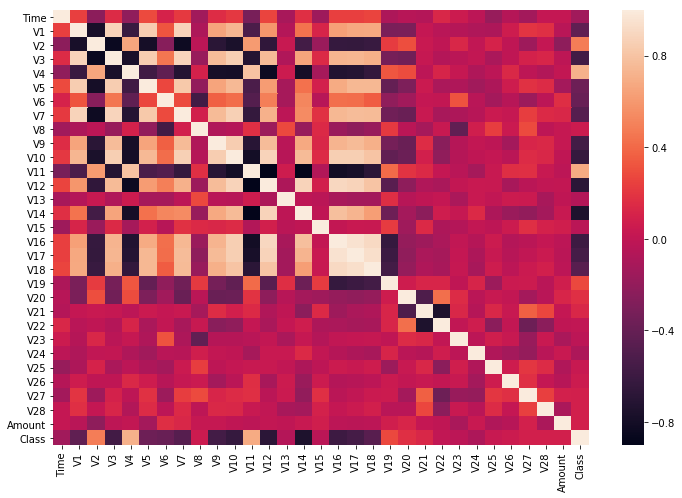

<Figure size 432x288 with 0 Axes>

In [65]:
plot_correlation_matrix(df, df.columns, imbalanced=True, label=label)

In [182]:
from xgboost import XGBClassifier

In [70]:
X, y = df[features], df[label]
run_kfold_cv(XGBClassifier(), X, y, n_jobs=-1)

printing result for model XGBClassifier:

	 train_accuracy: 0.9996672210261577 +/- 1.8876088360621232e-05
	 test_accuracy: 0.9986271787367447 +/- 0.0023661204193535664

	 train_f1: 0.8967466751791239 +/- 0.006208133596105092
	 test_f1: 0.7513887694898308 +/- 0.1872841181765415



In [72]:
features_importance = generate_features_importance(XGBClassifier(), X, y, generate_std=False, cv=10)

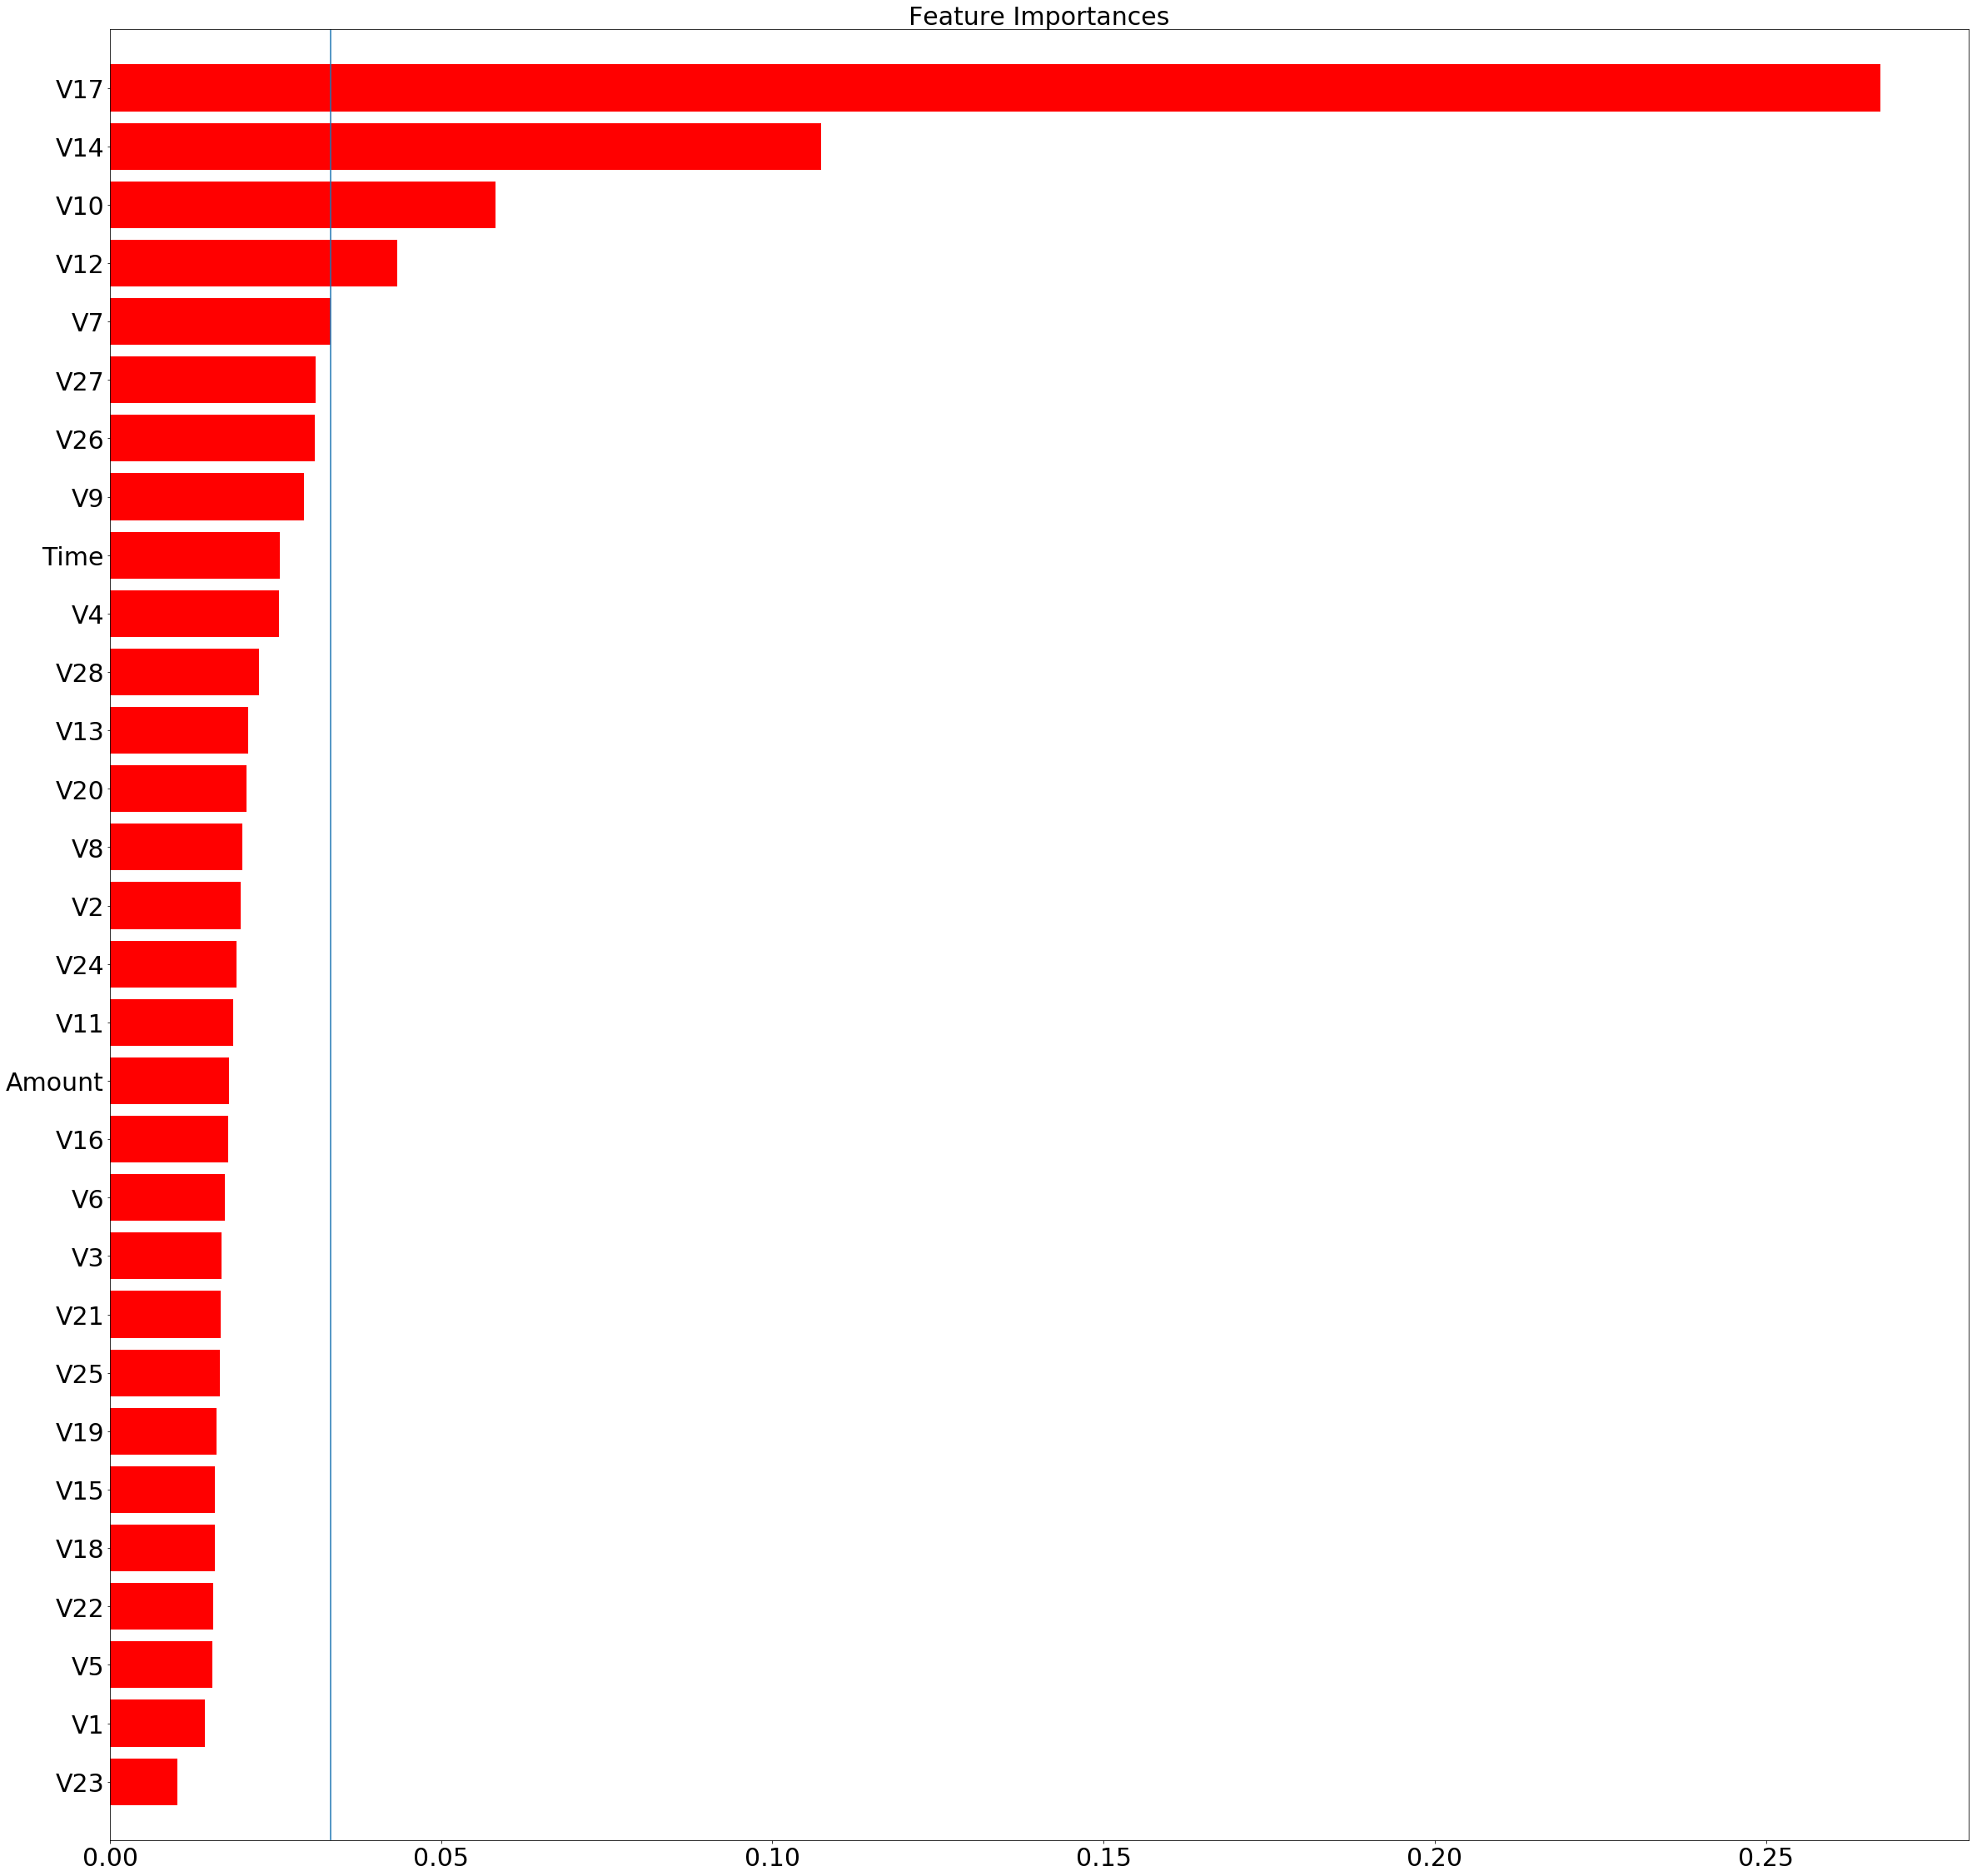

In [115]:
plot_bar_features_importance(X, y, features_importance=features_importance)

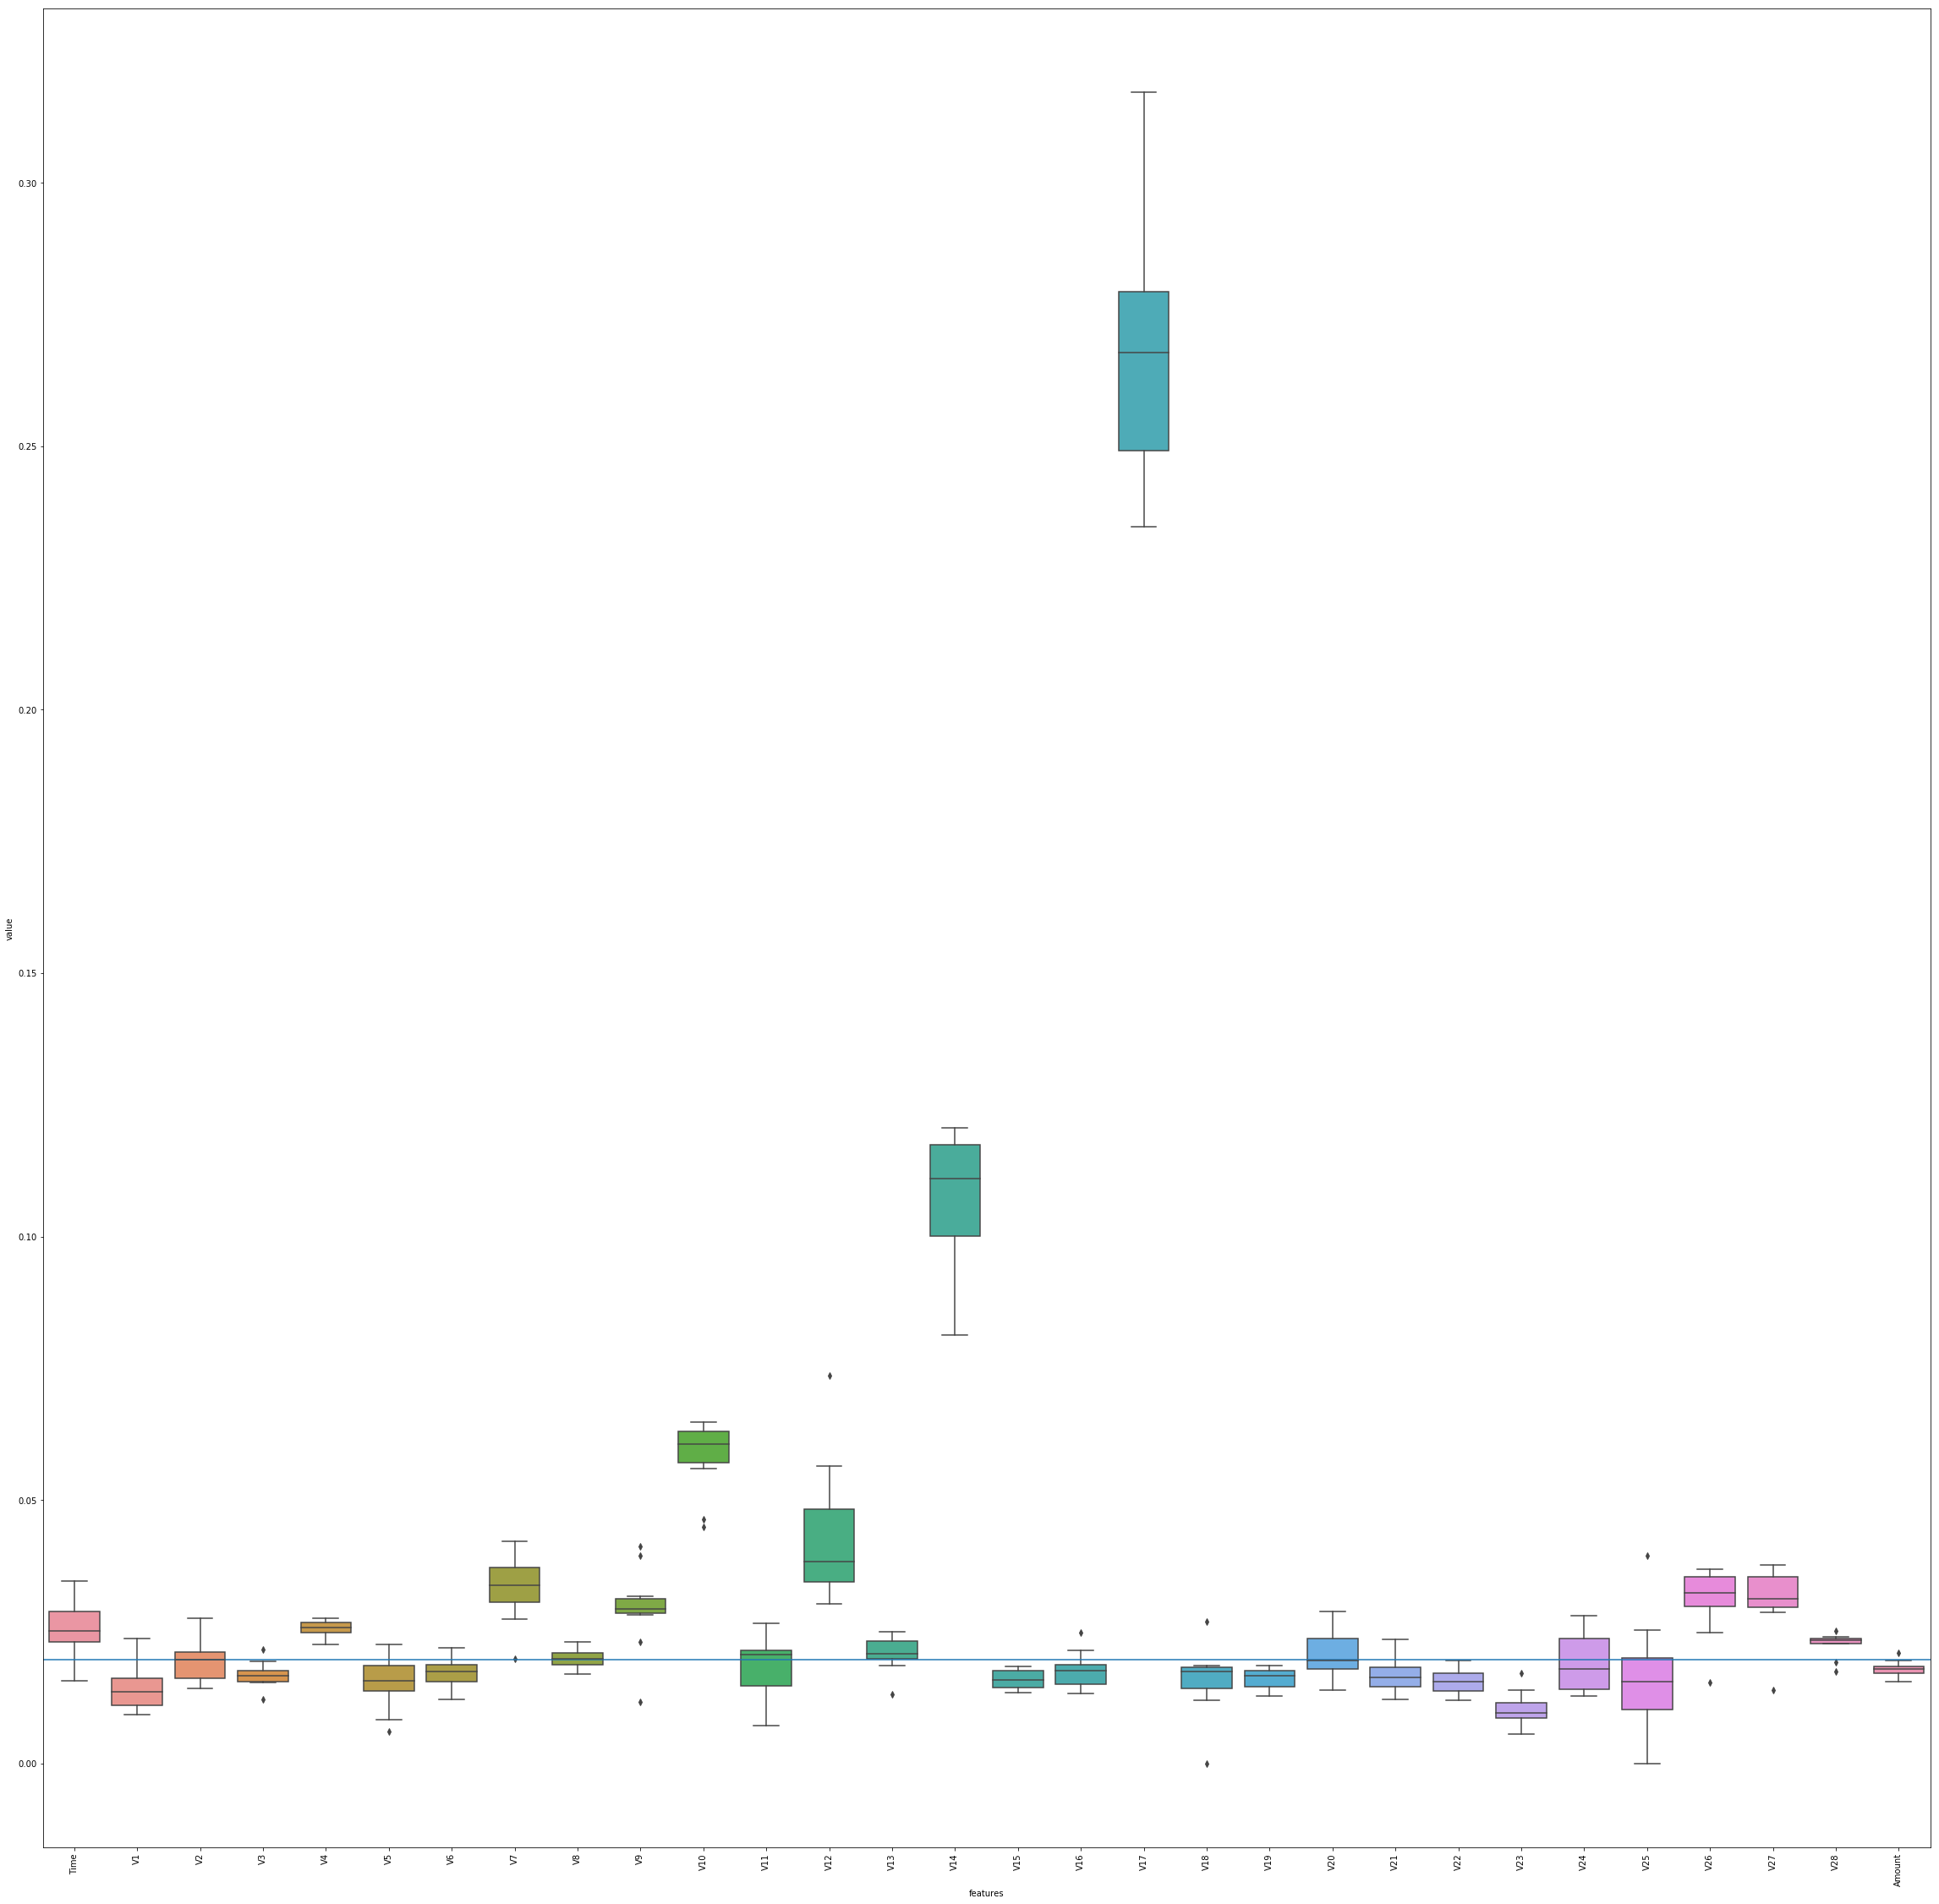

In [114]:
plot_box_features_importance(X, y, features_importance=features_importance)

In [164]:
ranked_features = np.array(features)[np.argsort(- np.mean(features_importance, axis=0))]

In [168]:
scores = generate_cumulative_top_features_scores(XGBClassifier(), X, y, 'f1', 10, ranked_features, n_fold=10,
                                                 n_jobs=-1)

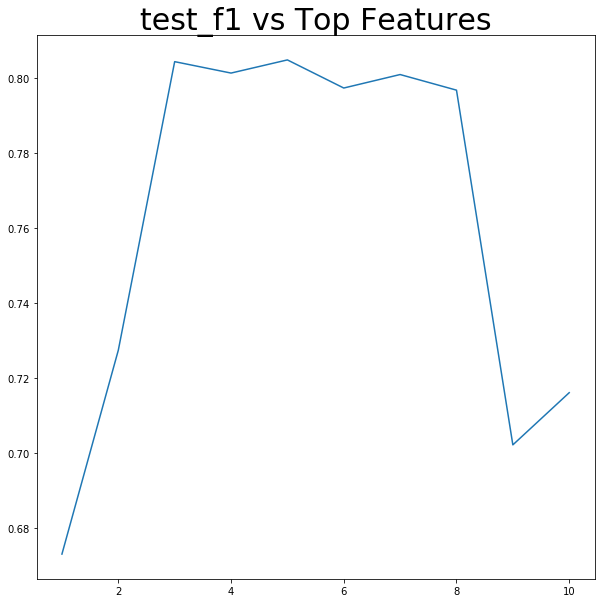

In [187]:
plot_score_by_top_features(X, y, 10, 'f1', model=None, figsize=(10, 10), cv=10, vline=None,
                           mean_importance=None, scores=scores)